# Overview

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Inspiration
Identify fraudulent credit card transactions.

Given the class imbalance ratio, we are measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Data can be downloaded from https://www.kaggle.com/mlg-ulb/creditcardfraud/downloads/creditcardfraud.zip/3
df= pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#Null Value Check
df.isnull().values.any()

False

In [5]:
#Data Class Balance Check
print('Fraud Percentage: {}'.format(round((df['Class'].value_counts()[1]/len(df))*100,2)))
print('Non Fraud Percentage: {}'.format(round((df['Class'].value_counts()[0]/len(df))*100,2)))

Fraud Percentage: 0.17
Non Fraud Percentage: 99.83


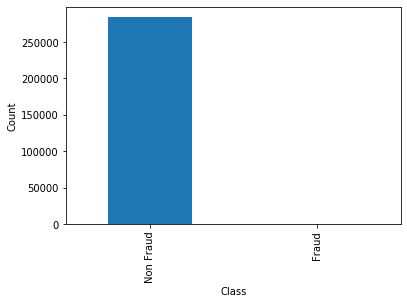

In [6]:
count= df['Class'].value_counts()
count.plot(kind='bar')
plt.xticks(range(2),['Non Fraud','Fraud'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

how imbalanced is our original dataset! Most of the transactions are non-fraud. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are not fraud. But we don't want our model to assume, we want our model to detect patterns that give signs of fraud!

# #Distributions:
By seeing the distributions we can have an idea how skewed are these features, we can also see further distributions of the other features. 

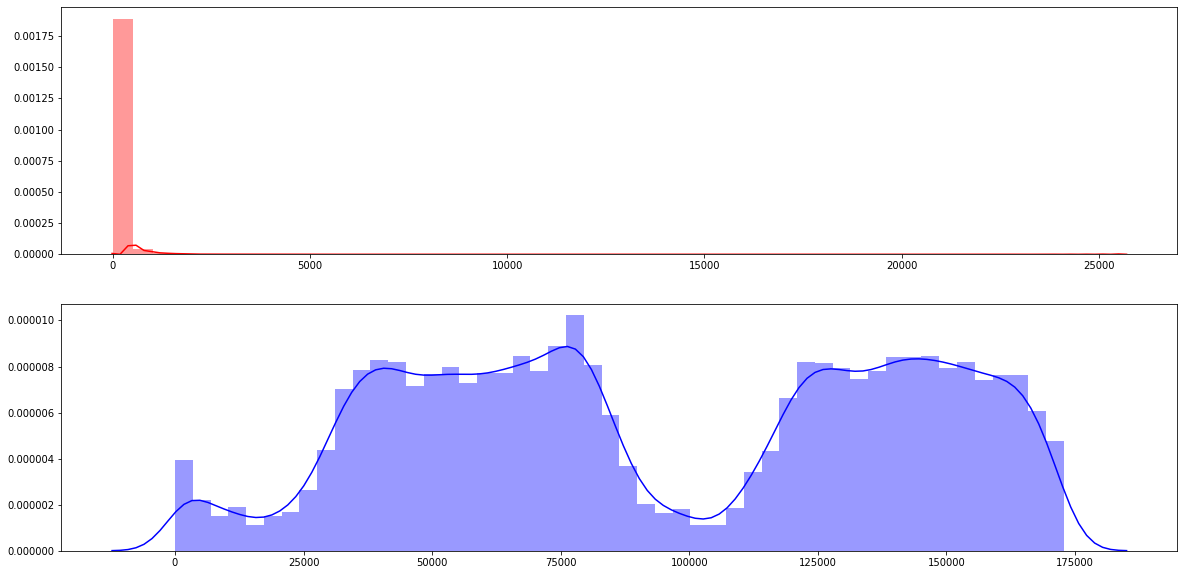

In [7]:
fig, ax= plt.subplots(2,1, figsize=(20,10))

amount= df['Amount'].values
time= df['Time'].values

sns.distplot(amount,ax=ax[0], color='r')
sns.distplot(time,ax=ax[1],color='b')


By distribution we can see transaction amounts are very small, where as time is distributed.

## Scaling
As data is given after PCA to hide original data so scalling was done on the variables except time and amount which we will scale


In [8]:
from sklearn.preprocessing import RobustScaler # it is prone to outliers
ss1= RobustScaler()
df['Amount']= ss1.fit_transform(df['Amount'].values.reshape(-1, 1))

In [9]:
ss2= RobustScaler()
df['Time']= ss2.fit_transform(df['Time'].values.reshape(-1, 1))

In [10]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0


## Splitting the Data (Original DataFrame)
Before proceeding with the Random UnderSampling technique we have to separate the orginal dataframe. Why? for testing purposes, remember although we are splitting the data when implementing Random UnderSampling or OverSampling techniques, we want to test our models on the original testing set not on the testing set created by either of these techniques. The main goal is to fit the model either with the dataframes that were undersample and oversample (in order for our models to detect the patterns), and test it on the original testing set.

In [11]:
xorg=df.drop('Class',axis=1)
yorg= df.loc[:,'Class']

In [12]:
from sklearn.model_selection import train_test_split
xorgtrain,xorgtest,yorgtrain,yorgtest= train_test_split(xorg,yorg,test_size=0.2,random_state=9)

In [13]:
print(xorgtrain.shape,xorgtest.shape,yorgtrain.shape,yorgtest.shape)

(227845, 30) (56962, 30) (227845,) (56962,)


## Random Sampling


we will implement "Random Under Sampling" which basically consists of removing data in order to have a more balanced dataset and thus avoiding our models to overfitting.

Note: The main issue with "Random Under-Sampling" is that we run the risk that our classification models will not perform as accurate as we would like to since there is a great deal of information loss (bringing 492 non-fraud transaction from 284,315 non-fraud transaction)

### Using imblearn library

In [14]:
# from imblearn.under_sampling import NearMiss

# nm=NearMiss(random_state=9)
# xr,yr= nm.fit_sample(xorg,yorg)

# from collections import Counter
# print('Original Count: {}'.format(Counter(yorg)))
# print('Sampled Count: {}'.format(Counter(yr)))

# # Now we have equal fraud and non fraud data.

# new_df= pd.concat([pd.DataFrame(xr,columns=xorg.columns),pd.DataFrame(yr)],axis=1)

# new_df= new_df.rename({0:'Class'},axis=1)

# new_df.head()

### Using shuffling and selecting first 492 non fraud

In [15]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492] #Taking top 492 row for 0

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
173679,0.433558,-0.005769,0.794385,-0.768303,-0.174575,2.350643,-0.984071,1.775844,-0.632660,-0.676264,...,0.213432,0.800280,-0.267536,-1.047088,-0.392518,-0.710188,0.059191,0.022052,-0.209739,0
8842,-0.852912,-4.696795,2.693867,-4.475133,5.467685,-1.556758,-1.549420,-4.104215,0.553934,-1.498468,...,0.573898,-0.080163,0.318408,-0.245862,0.338238,0.032271,-1.508458,0.608075,-0.307413,1
242168,0.783386,-0.843708,-0.819868,-1.412222,-0.338110,-0.533602,0.333184,3.002659,-0.348437,0.113394,...,0.124174,-0.503221,1.226249,-1.189136,0.084482,-0.120994,-0.144122,0.108671,8.230560,0
27738,-0.587507,-2.439237,2.591458,-2.840126,1.286244,-1.777016,-1.436139,-2.206056,-2.282725,-0.292885,...,1.774460,-0.771390,0.065727,0.103916,-0.057578,0.242652,-0.268649,-0.743713,1.443443,1
251904,0.832505,-1.040067,3.106703,-5.409027,3.109903,-0.887237,-2.497522,-2.073347,0.639818,-3.013331,...,0.773961,0.214868,-0.184233,-0.284091,0.493467,0.732329,0.675067,0.337076,1.017537,1


## Oversampling using RandomOverSampler

In [16]:
# from imblearn.over_sampling import RandomOverSampler
# nm= RandomOverSampler(ratio=1,random_state=42)
# xr,yr= nm.fit_sample(xorg,yorg)

# from collections import Counter
# print('Original Count: {}'.format(Counter(yorg)))
# print('Sampled Count: {}'.format(Counter(yr)))

# # Now we have equal fraud and non fraud data.

# new_df= pd.concat([pd.DataFrame(xr,columns=xorg.columns),pd.DataFrame(yr)],axis=1)

# new_df= new_df.rename({0:'Class'},axis=1)

# new_df.head()

In [17]:
new_df.shape

(984, 31)

In [18]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

# Correlation Matrices
Correlation matrices are the essence of understanding our data. We want to know if there are features that influence heavily in whether a specific transaction is a fraud. However, it is important that we use the correct dataframe (subsample) in order for us to see which features have a high positive or negative correlation with regards to fraud transactions.

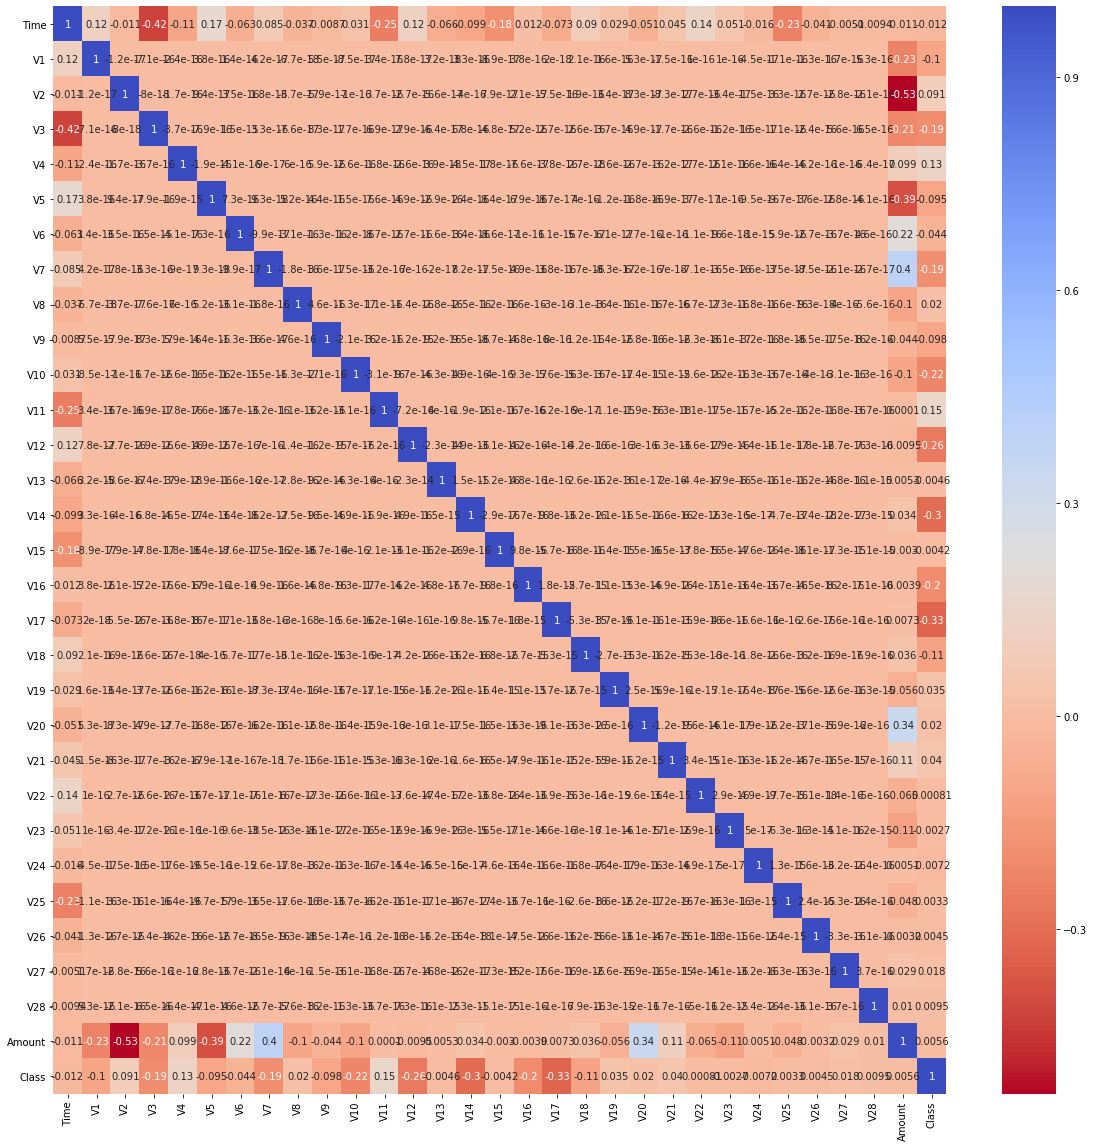

In [19]:
#for Original Data frame
plt.figure(figsize=(20,20))

sns.heatmap(df.corr(),annot=True,cmap='coolwarm_r')


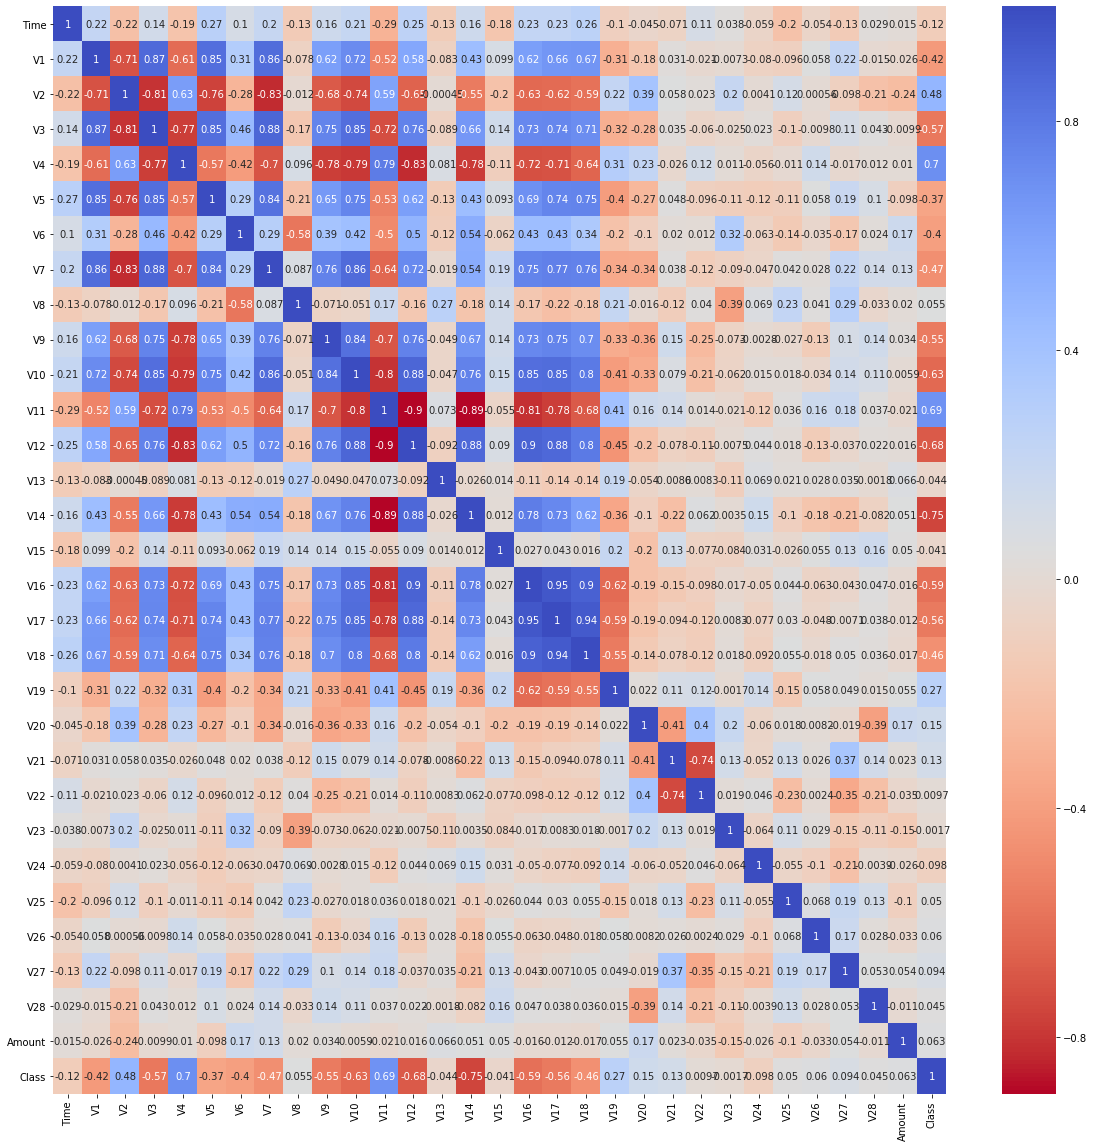

In [20]:
#For new sampled df
#for Original Data frame
plt.figure(figsize=(20,20))

sns.heatmap(new_df.corr(),annot=True,cmap='coolwarm_r')

1. Negative Correlations: V17,V16, V14, V12 and V10 are negatively correlated. Notice how the lower these values are, the more likely the end result will be a fraud transaction.
2. Positive Correlations: V2, V4, V11, and V19 are positively correlated. Notice how the higher these values are, the more likely the end result will be a fraud transaction.
3. BoxPlots: We will use boxplots to have a better understanding of the distribution of these features in fradulent and non fradulent transactions.

### Negative Correlation

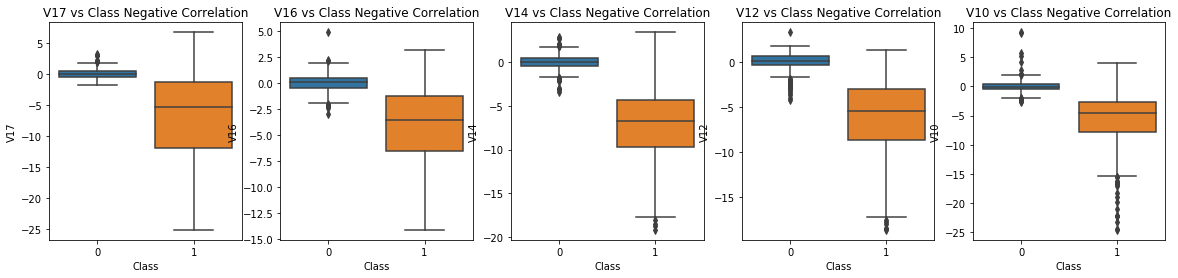

In [21]:
f, axes = plt.subplots(ncols=5, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=new_df, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V16", data=new_df, ax=axes[1])
axes[1].set_title('V16 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_df, ax=axes[2])
axes[2].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=new_df, ax=axes[3])
axes[3].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=new_df, ax=axes[4])
axes[4].set_title('V10 vs Class Negative Correlation')

plt.show()

## Positive Correlation

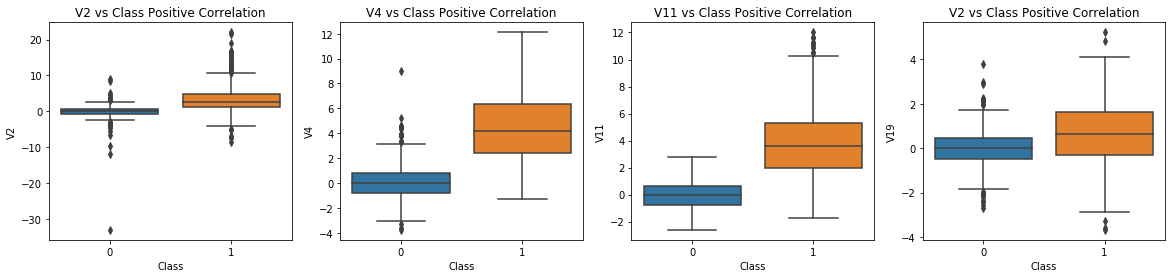

In [22]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Postive Correlations with our Class (The higher our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V2", data=new_df, ax=axes[0])
axes[0].set_title('V2 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=new_df, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V11", data=new_df, ax=axes[2])
axes[2].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V19", data=new_df, ax=axes[3])
axes[3].set_title('V2 vs Class Positive Correlation')

plt.show()


Doing with loop

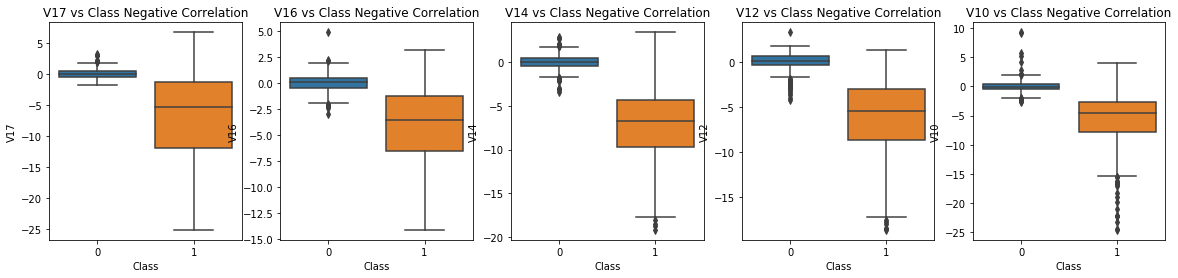

In [23]:
neg= ['V17','V16','V14','V12','V10']

f, axes = plt.subplots(ncols=len(neg), figsize=(20,4))
for i,j in enumerate(neg):
# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
    sns.boxplot(x="Class", y=j, data=new_df, ax=axes[i])
    axes[i].set_title(j + ' vs Class Negative Correlation')

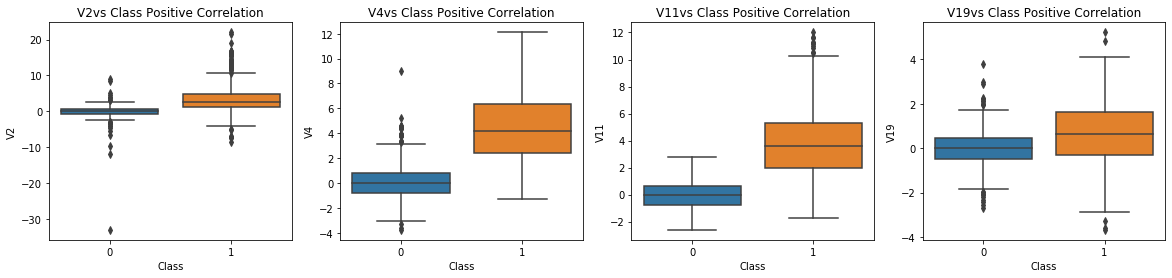

In [24]:
pos= ['V2','V4','V11','V19']

f, axes = plt.subplots(ncols=len(pos), figsize=(20,4))
for i,j in enumerate(pos):
# Postive Correlations with our Class (The higher our feature value the more likely it will be a fraud transaction)
    sns.boxplot(x="Class", y=j, data=new_df, ax=axes[i])
    axes[i].set_title(j+'vs Class Positive Correlation')

Boxplots are a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”).

median (Q2/50th Percentile): the middle value of the dataset.

first quartile (Q1/25th Percentile): the middle number between the smallest number (not the “minimum”) and the median of the dataset.

third quartile (Q3/75th Percentile): the middle value between the median and the highest value (not the “maximum”) of the dataset.

interquartile range (IQR): 25th to the 75th percentile.

whiskers (shown in blue)

outliers (shown as green circles)

“maximum”: Q3 + 1.5*IQR

“minimum”: Q1 -1.5*IQR

'outliers= 3* IQR or more than that

## Anomly Detection

1. visualize Distributions: We first start by visualizing the distribution of the feature we are going to use to eliminate some of the outliers. V14 is the only feature that has a Gaussian distribution compared to features V12 and V10.
2. Determining the threshold: After we decide which number we will use to multiply with the iqr (the lower more outliers removed), we will proceed in determining the upper and lower thresholds by substrating q25 - threshold (lower extreme threshold) and adding q75 + threshold (upper extreme threshold).
3. Conditional Dropping: Lastly, we create a conditional dropping stating that if the "threshold" is exceeded in both extremes, the instances will be removed.
4. Boxplot Representation: Visualize through the boxplot that the number of "extreme outliers" have been reduced to a considerable amount.

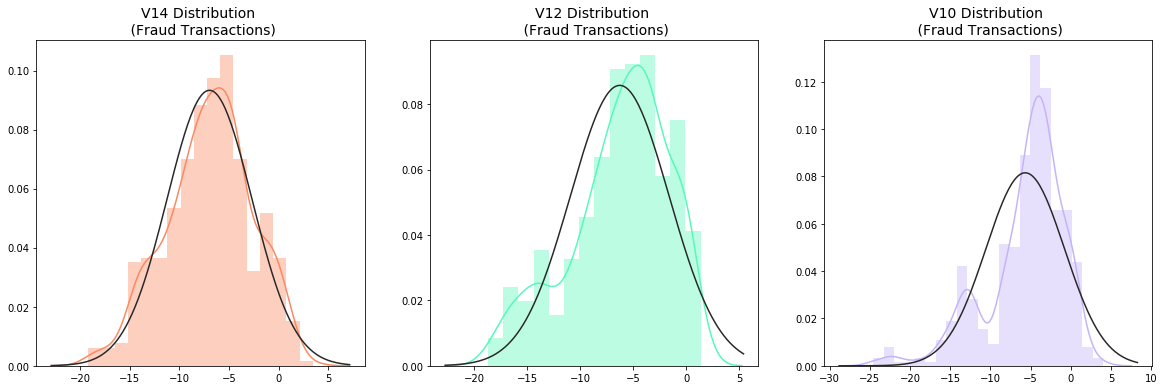

In [25]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

## Outliers Treatment
as we say in box plots all the variables with coorelation have outliers so now we will treat them in with iqr , lb and ub.

In [26]:
df2= new_df # I am creating the copy of new_df to preserve the original data
treat= ['V14','V12','V10']
for j in treat:
    q25,q75= new_df[j].quantile(q=0.25),new_df[j].quantile(q=0.75)
    iqr= q75-q25
    cut_off= iqr*1.5
    lb,ub= q25-cut_off,q75+cut_off
    outliers= [x for x in new_df[j] if x<=lb or x>=ub]
    print(j,'Q25: {} , Q75: {}, IQR: {}, Cutoff: {}, LB: {}, UB: {},'.format(q25,q75,iqr,cut_off,lb,ub))
    print(len(outliers), outliers)
    df2= df2.drop(df2[(df2['V14'] > ub) | (df2['V14']< lb)].index, axis=0)
    print(df2.shape)
    print('----' * 44)
    
    
# Tried imputing outliers.
#     lb,ub= new_df[j].quantile(q=0.05),new_df[j].quantile(q=0.95)
#     outliers= [x for x in new_df[j] if x>ub or x<lb]
#     print(len(outliers),outliers)
#     func= (lambda x: x if x>=ub or x<=lb else new_df[j].mean())
#     df2[j]= df2[j].apply(func)



V14 Q25: -6.721798975234555 , Q75: 0.13357942966220251, IQR: 6.855378404896758, Cutoff: 10.283067607345137, LB: -17.00486658257969, UB: 10.416647037007339,
8 [-18.049997689859396, -18.8220867423816, -19.2143254902614, -17.7216383537133, -17.230202160711, -17.6206343516773, -17.4759212828566, -18.4937733551053]
(976, 31)
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V12 Q25: -5.495220521268095 , Q75: 0.2374415235619628, IQR: 5.732662044830058, Cutoff: 8.598993067245088, LB: -14.094213588513183, UB: 8.83643459080705,
43 [-14.1750301634055, -14.9797547574476, -14.154165360960699, -17.1313009454468, -15.5923232225286, -17.631606313870698, -15.0226996343749, -15.0941631493865, -16.4655039422141, -15.479052483201599, -16.218610393127, -14.2750918465127, -17.7691434633638, -17.1829184301947, -18.553697009645802, -17.003289445516, -16.7283393320915, -17.18291843019

In [27]:
df2.shape

(904, 31)

In [28]:
from collections import Counter
Counter(df2['Class'])

Counter({0: 492, 1: 412})

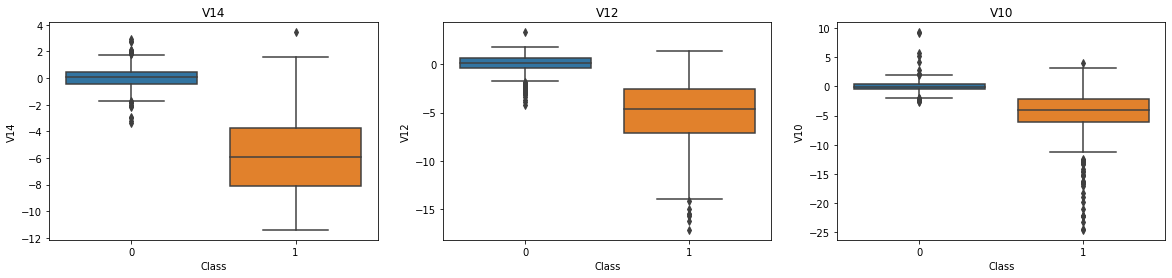

In [29]:
f, axes = plt.subplots(ncols=len(treat), figsize=(20,4))
for i,j in enumerate(treat):
# Postive Correlations with our Class (The higher our feature value the more likely it will be a fraud transaction)
    sns.boxplot(x="Class", y=j, data=df2, ax=axes[i])
    axes[i].set_title(j)

In [30]:
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

x=df2.drop('Class',axis=1).values
y= df2.loc[:,'Class'].values

# SPlitting the test and train after removing outliers

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

### Fitting the models and calculating test and training score

In [31]:
classifier= {
    'Logistic Regression':LogisticRegression(),
    'KNN':KNeighborsClassifier(),
    'SVC':SVC(),
    'DecisionTree':DecisionTreeClassifier()
}

import warnings
warnings.filterwarnings('ignore')

In [32]:
for key,values in classifier.items():
    values.fit(xtrain,ytrain)
    training_score= cross_val_score(values,xtrain,ytrain,cv=5)
    print('Training accuracy score of {} is {}'.format(key,round(training_score.mean()*100,2)))
    train_pred = cross_val_predict(values, xtrain, ytrain, cv=5)
    print('Roc_Auc training score for {} is {}: '.format(key, round(roc_auc_score(ytrain,train_pred)*100,2)))
    test_score= cross_val_score(values,xtest,ytest,cv=5)
    print('Test accuracy score of {} is {}'.format(key,round(test_score.mean()*100,2)))
    test_pred = cross_val_predict(values, xtest, ytest, cv=5)
    print('Roc_Auc test score for {} is {}: '.format(key, round(roc_auc_score(ytest,test_pred)*100,2)))
    print('---'*30)

Training accuracy score of Logistic Regression is 93.78
Roc_Auc training score for Logistic Regression is 93.5: 
Test accuracy score of Logistic Regression is 95.04
Roc_Auc test score for Logistic Regression is 94.54: 
------------------------------------------------------------------------------------------
Training accuracy score of KNN is 91.7
Roc_Auc training score for KNN is 91.25: 
Test accuracy score of KNN is 95.07
Roc_Auc test score for KNN is 94.23: 
------------------------------------------------------------------------------------------
Training accuracy score of SVC is 91.71
Roc_Auc training score for SVC is 91.55: 
Test accuracy score of SVC is 93.93
Roc_Auc test score for SVC is 93.73: 
------------------------------------------------------------------------------------------
Training accuracy score of DecisionTree is 89.36
Roc_Auc training score for DecisionTree is 89.3: 
Test accuracy score of DecisionTree is 90.66
Roc_Auc test score for DecisionTree is 92.11: 
------

### calculating for original data

In [33]:
for key,values in classifier.items():
    values.fit(xtrain,ytrain)
    test_score= cross_val_score(values,xorgtest,yorgtest,cv=5)
    print('Test accuracy score of {} is {}'.format(key,round(test_score.mean()*100,2)))
    test_pred = cross_val_predict(values, xorgtest,yorgtest, cv=5)
    print('Roc_Auc test score for {} is {}: '.format(key, round(roc_auc_score(yorgtest,test_pred)*100,2)))
    print('---'*30)

Test accuracy score of Logistic Regression is 99.93
Roc_Auc test score for Logistic Regression is 83.66: 
------------------------------------------------------------------------------------------
Test accuracy score of KNN is 99.92
Roc_Auc test score for KNN is 84.15: 
------------------------------------------------------------------------------------------
Test accuracy score of SVC is 99.87
Roc_Auc test score for SVC is 63.86: 
------------------------------------------------------------------------------------------
Test accuracy score of DecisionTree is 99.91
Roc_Auc test score for DecisionTree is 85.13: 
------------------------------------------------------------------------------------------


## Hyper Parameter Tuning using GridSearchCv


In [34]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}


classifier= {
    'Logistic Regression':LogisticRegression(),
    'KNN':KNeighborsClassifier(),
    'SVC':SVC(),
    'DecisionTree':DecisionTreeClassifier()
}

def grid_search(classifier,Param):
    grid_log_reg = GridSearchCV(classifier,param_grid=Param)
    grid_log_reg.fit(xtrain, ytrain)
    best_param = grid_log_reg.best_estimator_
    print('{} algorithm best parameter are : {}'.format(classifier.__class__.__name__,best_param))



grid_search(LogisticRegression(),log_reg_params)

LogisticRegression algorithm best parameter are : LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


In [35]:
log_reg= LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
log_reg.fit(xtrain,ytrain)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
log_reg_pred = cross_val_predict(log_reg, xtest, ytest, cv=5,method="decision_function")

In [37]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,threshold= roc_curve(ytest,log_reg_pred)

Text(0.5, 1.0, 'Auc Score is :0.980706995270102')

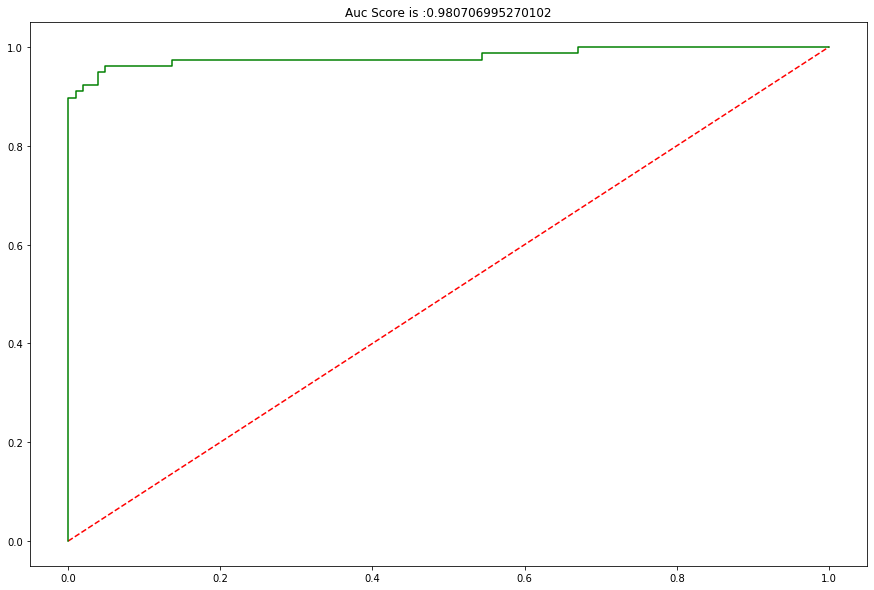

In [38]:
plt.figure(figsize=(15,10))
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr,tpr,'g')
plt.title('Auc Score is :'+str(auc(fpr,tpr)))

# Deeper look into the logistic regression classifier.

Terms:
1. True Positives: Correctly Classified Fraud Transactions
2. False Positives: Incorrectly Classified Fraud Transactions
3.  Negative: Correctly Classified Non-Fraud Transactions
4. False Negative: Incorrectly Classified Non-Fraud Transactions
5. Precision: True Positives/(True Positives + False Positives)
6. Recall: True Positives/(True Positives + False Negatives)

Precision as the name says, says how precise (how sure) is our model in detecting fraud transactions while recall is the amount of fraud cases our model is able to detect.

Precision/Recall Tradeoff: The more precise (selective) our model is, the less cases it will detect. Example: Assuming that our model has a precision of 95%, Let's say there are only 5 fraud cases in which the model is 95% precise or more that these are fraud cases. Then let's say there are 5 more cases that our model considers 90% to be a fraud case, if we lower the precision there are more cases that our model will be able to detect.

In [39]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
y_pred = log_reg.predict(xtest)

print('Recall Score: {:.2f}'.format(recall_score(ytest, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(ytest, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(ytest, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(ytest, y_pred)))

Recall Score: 0.92
Precision Score: 0.96
F1 Score: 0.94
Accuracy Score: 0.95


## Testing on orginal dataset

In [40]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
y_pred = log_reg.predict(xorgtest)

print('Recall Score: {:.2f}'.format(recall_score(yorgtest, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(yorgtest, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(yorgtest, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(yorgtest, y_pred)))

Recall Score: 0.92
Precision Score: 0.05
F1 Score: 0.09
Accuracy Score: 0.97


so while predicting on original test values it has an unaccepted accuracy which shows our model is over fitted. This over fitting occured because we did the sampling before cross validating.

So we will do undersampling during cross validation, which will be correct value for down sampling

# Overfitting during Cross Validation:¶

In our undersample analysis I want to show you a common mistake I made that I want to share with all of you. It is simple, if you want to undersample or oversample your data you should not do it before cross validating. Why because you will be directly influencing the validation set before implementing cross-validation causing a "data leakage" problem.you will see amazing precision and recall scores but in reality our data is overfitting!

Below I am doing undersampling during cross validation but still accuracy wont be good, as in undersampling we loose the information.

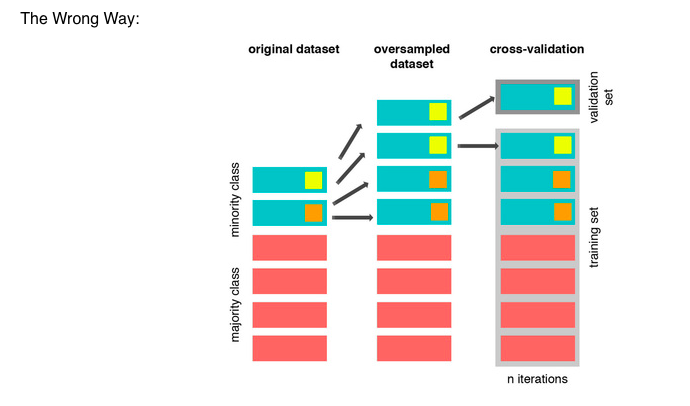



if we get the minority class ("Fraud) in our case, and create the synthetic points before cross validating we have a certain influence on the "validation set" of the cross validation process. Remember how cross validation works, let's assume we are splitting the data into 5 batches, 4/5 of the dataset will be the training set while 1/5 will be the validation set. The test set should not be touched! For that reason, we have to do the creation of synthetic datapoints "during" cross-validation and not before, just like below: 

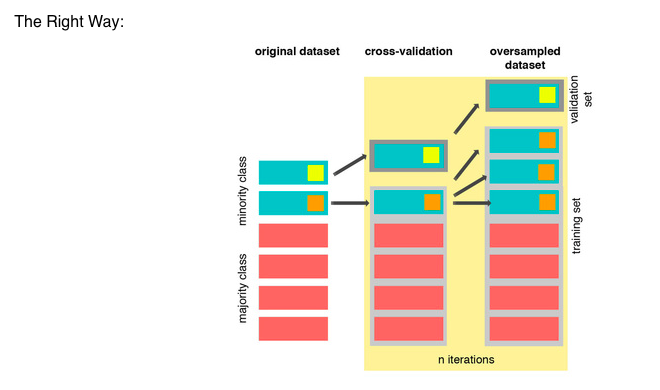

In [41]:
# We will undersample during cross validating
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.under_sampling import NearMiss

undersample_X = df.drop('Class', axis=1)
undersample_y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(undersample_X, undersample_y):
    print("Train:", train_index, "Test:", test_index)
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]
    
undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values 

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

# Implementing NearMiss Technique 
# Distribution of NearMiss (Just to see how it distributes the labels we won't use these variables)

X_nearmiss, y_nearmiss = NearMiss().fit_sample(undersample_X.values, undersample_y.values)
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))

rand_log_reg1 = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)
# Cross Validating the right way

for train, test in sss.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), rand_log_reg1) # SMOTE happens during Cross Validation not before..
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])
    
    undersample_accuracy.append(undersample_pipeline.score(undersample_Xtrain[test], undersample_ytrain[test]))
    undersample_precision.append(precision_score(undersample_ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(undersample_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(undersample_ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(undersample_ytrain[test], undersample_prediction))

    
print('--' * 45)
print("accuracy: {}".format(np.mean(undersample_accuracy)))
print("precision: {}".format(np.mean(undersample_precision)))
print("recall: {}".format(np.mean(undersample_recall)))
print("f1: {}".format(np.mean(undersample_f1)))
print("AUC: {}".format(np.mean(undersample_auc)))
print('--' * 45)

Using TensorFlow backend.


Train: [ 56961  56962  56963 ... 284804 284805 284806] Test: [    0     1     2 ... 56959 56960 57132]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 56961  56962  56963 ... 113935 113936 113937]
Train: [     0      1      2 ... 284804 284805 284806] Test: [107914 108432 109214 ... 170890 170891 170892]
Train: [     0      1      2 ... 284804 284805 284806] Test: [164794 164796 168169 ... 227848 227849 227850]
Train: [     0      1      2 ... 227848 227849 227850] Test: [225244 226257 226331 ... 284804 284805 284806]
NearMiss Label Distribution: Counter({0: 492, 1: 492})
------------------------------------------------------------------------------------------
accuracy: 0.6352189013995068
precision: 0.004429760050012552
recall: 0.9337877312560856
f1: 0.008817406256217766
AUC: 0.7842444326627731
------------------------------------------------------------------------------------------


In [42]:
from sklearn.metrics import classification_report
labels = ['No Fraud', 'Fraud']
nm_prediction = rand_log_reg1.best_estimator_.predict(undersample_Xtest)
print(classification_report(undersample_ytest, nm_prediction, target_names=labels))

              precision    recall  f1-score   support

    No Fraud       1.00      0.68      0.81     56863
       Fraud       0.01      0.94      0.01        98

    accuracy                           0.68     56961
   macro avg       0.50      0.81      0.41     56961
weighted avg       1.00      0.68      0.81     56961



Average precision-recall score: 0.04


Text(0.5, 1.0, 'Under Sampling Precision-Recall curve: \n Average Precision-Recall Score =0.04')

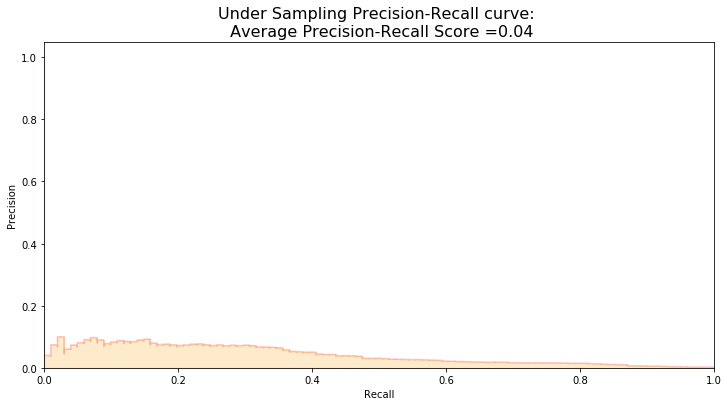

In [49]:
best= rand_log_reg1.best_estimator_
y_score = best.decision_function(xorgtest)

from sklearn.metrics import average_precision_score
average_precision = average_precision_score(yorgtest, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

fig = plt.figure(figsize=(12,6))

from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(yorgtest, y_score)

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Under Sampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision), fontsize=16)

# Smote for Over sampling.
now we will increase our data points so that we dont losse any informations

SMOTE stands for Synthetic Minority Over-sampling Technique. Unlike Random UnderSampling, SMOTE creates new synthetic points in order to have an equal balance of the classes. This is another alternative for solving the "class imbalance problems". 


Understanding SMOTE:

1. Solving the Class Imbalance: SMOTE creates synthetic points from the minority class in order to reach an equal balance between the minority and majority class.
2. Location of the synthetic points: SMOTE picks the distance between the closest neighbors of the minority class, in between these distances it creates synthetic points.
3. Final Effect: More information is retained since we didn't have to delete any rows unlike in random undersampling.
4. Accuracy || Time Tradeoff: Although it is likely that SMOTE will be more accurate than random under-sampling, it will take more time to train since no rows are eliminated as previously stated.

SMOTE will be done "during" cross validation and not "prior" to the cross validation process. Synthetic data are created only for the training set without affecting the validation set.

In [43]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE


print('Length of X (train): {} | Length of y (train): {}'.format(len(xorgtrain), len(yorgtrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(xorgtest), len(yorgtest)))

# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Classifier with optimal parameters
# log_reg_sm = LogisticRegression()
rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
# Implementing SMOTE Technique 
# Cross Validating the right way
# Parameters
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
for train, test in sss.split(xorgtrain, yorgtrain):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg)
    # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(xorgtrain.iloc[train], yorgtrain.iloc[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(xorgtrain.iloc[test])
    
    accuracy_lst.append(pipeline.score(xorgtrain.iloc[test], yorgtrain.iloc[test]))
    precision_lst.append(precision_score(yorgtrain.iloc[test], prediction))
    recall_lst.append(recall_score(yorgtrain.iloc[test], prediction))
    f1_lst.append(f1_score(yorgtrain.iloc[test], prediction))
    auc_lst.append(roc_auc_score(yorgtrain.iloc[test], prediction))
    
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)


Length of X (train): 227845 | Length of y (train): 227845
Length of X (test): 56962 | Length of y (test): 56962
---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.9735039134715558
precision: 0.05579803985453106
recall: 0.9027913015254787
f1: 0.1050536811104785
---------------------------------------------------------------------------------------------------------------------------------------


In [44]:
from sklearn.metrics import classification_report
labels = ['No Fraud', 'Fraud']
smote_prediction = best_est.predict(xorgtest)
print(classification_report(yorgtest, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

    No Fraud       1.00      0.97      0.99     56861
       Fraud       0.05      0.91      0.10       101

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.54     56962
weighted avg       1.00      0.97      0.98     56962



In [45]:
y_score = best_est.decision_function(xorgtest)

from sklearn.metrics import average_precision_score
average_precision = average_precision_score(yorgtest, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.75


Text(0.5, 1.0, 'OverSampling Precision-Recall curve: \n Average Precision-Recall Score =0.75')

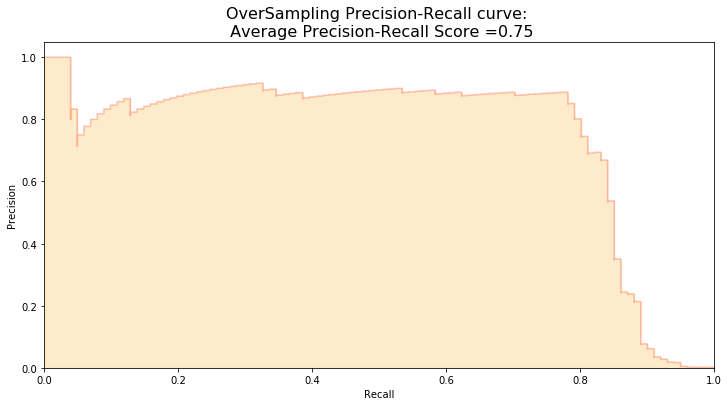

In [46]:
fig = plt.figure(figsize=(12,6))

from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(yorgtest, y_score)

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision), fontsize=16)